In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds


# Step 1: Load MovieLens 100k data from file or URL
url = 'https://files.grouplens.org/datasets/movielens/ml-100k/u.data'
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv(url, sep='\t', names=column_names)

# Create a pivot table (user-item matrix) for ratings
ratings_matrix = df.pivot(index='user_id', columns='item_id', values='rating')
 

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.sparse.linalg import svds
 
# Step 3: Identify non-NA entries in the ratings matrix
non_na_mask = ratings_matrix.notna()

# Convert mask to a list of non-NA (user, item) pairs
non_na_indices = np.argwhere(non_na_mask.values)  # Get (row, col) indices of non-NA values

# Randomly select 20% of non-NA entries to introduce missing data
n_remove = int(0.2 * len(non_na_indices))  # 20% of available data
remove_indices = np.random.choice(np.arange(len(non_na_indices)), size=n_remove, replace=False)

# Save the original values that will be removed for later evaluation
original_values = ratings_matrix.copy()

# Step 4: Introduce missing values
ratings_matrix_masked = ratings_matrix.copy()

# Set the selected 20% of data points to NaN
for index in remove_indices:
    row, col = non_na_indices[index]  # Get the (row, col) pair
    ratings_matrix_masked.iloc[row, col] = np.nan  # Set the value at that position to NaN

# Step 5: Fill the missing values with 0 for SVD input (other methods can be used here)
R_filled = ratings_matrix_masked.fillna(0).values

# Step 6: Apply SVD (Singular Value Decomposition)
# Decompose the matrix using SVD
U, sigma, Vt = svds(R_filled, k=50)  # Using 50 latent factors
sigma = np.diag(sigma)  # Convert sigma (1D array) to a diagonal matrix

# Reconstruct the matrix using the decomposed matrices
R_predicted = np.dot(np.dot(U, sigma), Vt)

# Step 7: Evaluate performance of the SVD model
# Create a DataFrame for the predicted ratings
imputed_ratings = pd.DataFrame(R_predicted, columns=ratings_matrix.columns, index=ratings_matrix.index)

# Calculate RMSE on the originally removed 20% of the data
true_values = original_values.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.iloc[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]



In [3]:
# Extract the values from the original matrix and imputed matrix for comparison
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]
predicted_values = imputed_ratings.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Predicted values shape: {predicted_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == predicted_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    print(f'RMSE for the SVD-based prediction: {rmse}')
else:
    print("Error: Shape mismatch between true values and predicted values.")


True values shape: (20000,)
Predicted values shape: (20000,)
RMSE for the SVD-based prediction: 2.879682599724702


In [4]:
ratings_matrix_masked 

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,NaN,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import numpy as np
from fancyimpute import IterativeSVD
import sys
import os
import matplotlib.pyplot as plt

# Add the path to utils.py
sys.path.append(r"c:\Document\Serieux\Travail\python_work\cEBNM_torch\py")
from cEBMF import *

In [6]:
mycebmf= cEBMF(data= np.array(ratings_matrix_masked), K=12,
               prior_L = "exp",
               prior_F = "exp")

In [7]:
mycebmf.init_LF()
print(mycebmf.L[:,1])
print(mycebmf.F[:,1])
print(mycebmf.K)

The array contains missing values (NaN), generate initialization using iterive svd.
[IterativeSVD] Iter 1: observed MAE=2.680426
[IterativeSVD] Iter 2: observed MAE=2.144061
[IterativeSVD] Iter 3: observed MAE=1.732412
[IterativeSVD] Iter 4: observed MAE=1.416035
[IterativeSVD] Iter 5: observed MAE=1.218222
[IterativeSVD] Iter 6: observed MAE=1.097939
[IterativeSVD] Iter 7: observed MAE=1.016063
[IterativeSVD] Iter 8: observed MAE=0.956949
[IterativeSVD] Iter 9: observed MAE=0.912220
[IterativeSVD] Iter 10: observed MAE=0.876983
[IterativeSVD] Iter 11: observed MAE=0.848586
[IterativeSVD] Iter 12: observed MAE=0.825208
[IterativeSVD] Iter 13: observed MAE=0.805537
[IterativeSVD] Iter 14: observed MAE=0.788798
[IterativeSVD] Iter 15: observed MAE=0.774378
[IterativeSVD] Iter 16: observed MAE=0.761873
[IterativeSVD] Iter 17: observed MAE=0.750850
[IterativeSVD] Iter 18: observed MAE=0.741076
[IterativeSVD] Iter 19: observed MAE=0.732327
[IterativeSVD] Iter 20: observed MAE=0.724428
[Iter

In [8]:
for i in range(60):
    mycebmf.iter()

c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\cEBMF.py:327: RuntimeWarning: divide by zero encountered in power
  s_f = (denominator_f_hat) ** (-0.5)+1e-6
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ash.py:47: RuntimeWarning: overflow encountered in exp
  optimal_pi = optimize_pi( np.exp(L),
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:237: RuntimeWarning: invalid value encountered in divide
  w = w / w.sum(axis=0, keepdims=True)  # Normalize by sum over k for each j
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:42: RuntimeWarning: overflow encountered in exp
  scaled_res = -np.exp(dnorm_diff - pnorm_diff)
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\numerical_routine.py:86: RuntimeWarning: overflow encountered in exp
  beta_frac = beta * np.exp(stats.norm.logpdf(beta) - pnorm_diff)
c:\Document\Serieux\Travail\python_work\cEBNM_torch\py\ash.py:58: RuntimeWarning: overflow encountered in exp
  log

ValueError: cannot convert float NaN to integer

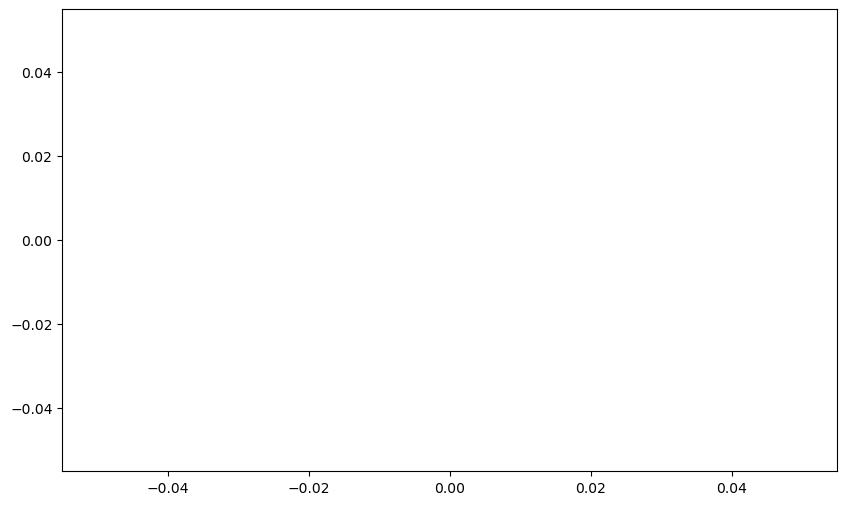

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(np.array(mycebmf.obj)[1:], marker='o', linestyle='-', color='b')

In [ ]:
# Assuming 'Y' is the numpy array with your imputed data
# Also assuming 'original_values' is the original DataFrame before you removed 20% of the data
Y= mycebmf.Y_fit
# Extract the original values that were removed (same as before)
true_values = original_values.values[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Extract the corresponding imputed values from Y
imputed_values = Y[non_na_indices[remove_indices][:, 0], non_na_indices[remove_indices][:, 1]]

# Check if their shapes match
print(f"True values shape: {true_values.shape}")
print(f"Imputed values shape: {imputed_values.shape}")

# Calculate RMSE if shapes match
if true_values.shape == imputed_values.shape:
    rmse = np.sqrt(mean_squared_error(true_values, imputed_values))
    print(f'RMSE for your custom imputation method: {rmse}')
else:
    print("Error: Shape mismatch between true values and imputed values.")


In [ ]:
k=1
mycebmf.cal_partial_residuals(k=k)
lhat , s_l  = compute_hat_l_and_s_l(Z = mycebmf.Rk,
                                                            nu = mycebmf.F[:,k] ,
                                                            omega= mycebmf.F2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
 
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2) 



np.isinf (lhat ).any()
sebetahat 

In [ ]:


ash_obj = ash(betahat   =lhat,
                      sebetahat =s_l ,
                      prior     = mycebmf.prior_L,
                      verbose=False
                      )
print(ash_obj.post_mean)
mycebmf.L  [:,k] =ash_obj.post_mean
mycebmf.L2 [:,k] =ash_obj.post_mean2

In [ ]:
k=0
mycebmf.cal_partial_residuals(k=k)

fhat , s_f  = compute_hat_f_and_s_f(Z = mycebmf.Rk,
                                                            nu = mycebmf.L[:,k] ,
                                                            omega= mycebmf.L2[:,k], 
                                                            tau= mycebmf.tau,
                                                            has_nan=mycebmf.has_nan)
plt.scatter(s_f, fhat)

ash_obj = ash(betahat   =fhat,
                      sebetahat =s_f ,
                      prior     = mycebmf.prior_F,
                      verbose=False
                      )
print(ash_obj.scale)

mycebmf.F  [:,k] =ash_obj.post_mean
mycebmf.F2 [:,k] =ash_obj.post_mean2
print(ash_obj.log_lik2)

In [27]:
betahat   =fhat 
sebetahat =s_f  +1e-7
prior     = mycebmf.prior_F 

In [28]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))

L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=True)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

In [ ]:
optimal_pi
plt.scatter(optimal_pi, range(optimal_pi.shape[0]))





In [ ]:
plt.scatter(fhat,out.post_mean )

In [ ]:
L

In [ ]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=np.sqrt(2))
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=penalty,
                                 verbose=verbose)  
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

In [ ]:
sigmaamax  

In [29]:
s_f=1e-8+s_f

In [ ]:
betahat   =lhat
sebetahat =s_l 
prior     = mycebmf.prior_L
verbose=False
mult=np.sqrt(2)

plt.scatter(betahat, sebetahat)

In [ ]:
np.sqrt(1e-32)
 
plt.scatter(betahat,np.log(sebetahat))
plt.axvline(x=0, color='red', linestyle='--')  # Add a horizontal line at y=0

In [ ]:
ash_obj.post_mean

In [ ]:
plt.scatter(s_f, fhat)

In [ ]:
scale=autoselect_scales_mix_exp(betahat  = betahat,
                                         sebetahat= sebetahat,
                                          mult=1.5)
print(scale)
L= get_data_loglik_exp(betahat=betahat ,
                                 sebetahat=sebetahat , 
                                 scale=scale)
optimal_pi = optimize_pi( np.exp(L),
                                 penalty=10,
                                 verbose=verbose)  
print((L[5,:]))
sebetahat[5]

In [ ]:
mycebmf.Rk[5,:]
np.isnan(mycebmf.Rk[5,:]).sum()
mycebmf.data.shape

In [17]:
log_pi=  np.tile(np.log(optimal_pi+1e-32), (betahat.shape[0],1))
        
out= posterior_mean_exp(betahat, sebetahat,
                                 log_pi=log_pi, 
                                 scale=scale)

In [ ]:
subset_sebetahat = sebetahat[betahat == 0]
subset_sebetahat

In [19]:
Z = mycebmf.Rk
nu = mycebmf.F[:,k] 
omega= mycebmf.F2[:,k]
tau= mycebmf.tau
has_nan=mycebmf.has_nan
 
numerator_l_hat = np.sum(tau * Z * nu, axis=1)
denominator_l_hat = np.sum(tau * omega, axis=1) + 1e-32

In [ ]:
denominator_l_hat